In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import relativedelta as rdelta
from datetime import date, timedelta
from scipy.stats import kurtosis, skew, chi2_contingency, shapiro, jarque_bera, f_oneway, ttest_1samp
plt.style.use("ggplot")

# Ayiti Analytics Probability and Statistics Project

Use all the files to have a final datasets to have the following columns
   <ul>
    <li>questid</li>
    <li>gender</li>
    <li>age (age of applicant)</li>
    <li>communeName (use data prep in commune file)</li>
    <li>application_date (created at in quest file)</li>
    <li>enroll_date (created_at in enroll file)</li>
    <li>is_enroll (Yes/No) (use data prep in enroll file)</li>
    <li>Education Level</li>
   <li>Communication channels(hear_AA1)</li>
    <li>Bootcamp Insterest (after_AA)</li>
    <li>Payement Date (use ord and transaction files)</li>
    <li>Payed (Yes/No)</li>
    <li>list Technologies as columns based (use get_dummies)</li>
    <li>list  Study domains (use get_dummies)</li>
    <li>Job is formal</li>
    <li>Have computer at home</li>
    <li>Have internet at home</li>
    
   </ul>
   

Files importation

In [2]:
commune = pd.read_excel(r"commune.xlsx")
enroll = pd.read_csv(r"enroll.csv")
quest = pd.read_csv(r"quest.csv")
industry = pd.read_csv(r"industry.csv")
ord = pd.read_csv(r"ord.csv")
study_domain = pd.read_csv(r"study_domain.csv")
transaction = pd.read_csv(r"transaction.csv")
technology = pd.read_csv(r"technology.csv")

Data Processing

In [3]:
quest_db = quest.drop(["Unnamed: 0", "modified_at","department", "university", "study_domain", "current_employed"], axis=1)

In [4]:
def arrange_date(data, col=""):
  data[col] = data[col].str[:10]
  data[col] = pd.to_datetime(data[col])
  return col

In [5]:
                                               quest_db.rename(columns={"created_at": "application_date", "hear_AA_1":"channels","after_AA":"interest"}, inplace=True)
arrange_date(quest_db, col="application_date")
quest_db["dob"].replace({"3 aout 1977": "3/08/1977"}, inplace=True)
quest_db["dob"] = pd.to_datetime(quest_db["dob"])

In [6]:
quest_db["age"] = (-(quest_db["dob"]-quest_db["application_date"])//timedelta(days=365))

In [7]:
quest_db.columns

Index(['gender', 'dob', 'commune', 'application_date', 'education_level',
       'formal_sector_job', 'have_computer_home', 'internet_at_home',
       'channels', 'interest', 'quest_id', 'age'],
      dtype='object')

In [8]:
quest_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   gender              250 non-null    object        
 1   dob                 244 non-null    datetime64[ns]
 2   commune             250 non-null    object        
 3   application_date    250 non-null    datetime64[ns]
 4   education_level     250 non-null    object        
 5   formal_sector_job   250 non-null    object        
 6   have_computer_home  250 non-null    object        
 7   internet_at_home    250 non-null    object        
 8   channels            250 non-null    object        
 9   interest            250 non-null    object        
 10  quest_id            250 non-null    object        
 11  age                 244 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(9)
memory usage: 23.6+ KB


In [9]:
quest_db[quest_db["age"]<2] #invalid ages need to be replaced

,gender,dob,commune,application_date,education_level,formal_sector_job,have_computer_home,internet_at_home,channels,interest,quest_id,age
25,male,2021-02-28,ht0111,2021-02-19,High School (16 years),Yes,Yes,Yes,WhatsApp,Mentorship,906036c8-ce95-11eb-8c78-7c67a234f601,-1.0
92,male,2021-08-14,ht0112,2021-02-18,Other,unknown,Yes,Yes,Friend,Improving my data analysis skills,9064923b-ce95-11eb-a771-7c67a234f601,-1.0
176,male,2021-02-18,ht0114,2021-02-19,Bachelors (bacc +4),unknown,Yes,No,WhatsApp,Training to start my own company,9067e4c0-ce95-11eb-bebe-7c67a234f601,0.0
209,female,2020-01-22,ht0711,2021-02-16,Other,unknown,No,No,WhatsApp,Improving my data analysis skills,9069a205-ce95-11eb-be5a-7c67a234f601,1.0
210,female,2021-05-08,ht0117,2021-02-17,Other,unknown,Yes,Yes,ESIH,Improving my data analysis skills,9069a206-ce95-11eb-9c6f-7c67a234f601,-1.0
219,male,2021-07-25,ht0432,2021-02-19,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,Finding a job/internship,9069ddd8-ce95-11eb-b0fb-7c67a234f601,-1.0
229,male,2021-07-18,ht0421,2021-02-20,Bachelors (bacc +4),Yes,Yes,Yes,Facebook,Improving my data analysis skills,906a52b4-ce95-11eb-b9bd-7c67a234f601,-1.0


In [10]:
quest_db[quest_db["age"].isnull()] #NaN ages needed to be replaced 

,gender,dob,commune,application_date,education_level,formal_sector_job,have_computer_home,internet_at_home,channels,interest,quest_id,age
35,male,NaT,ht0111,2021-02-23,Other,unknown,Yes,Yes,WhatsApp,Training to start my own company,9060e347-ce95-11eb-abbb-7c67a234f601,NaN
58,male,NaT,ht0111,2021-03-14,Bachelors (bacc +4),unknown,Yes,Yes,ESIH,other,906241d5-ce95-11eb-9850-7c67a234f601,NaN
116,female,NaT,ht0112,2021-03-03,Bachelors (bacc +4),unknown,Yes,Yes,Friend,Improving my data analysis skills,9065822a-ce95-11eb-9df5-7c67a234f601,NaN
154,female,NaT,ht0113,2021-02-18,Bachelors (bacc +4),unknown,Yes,Yes,Facebook,Finding a job/internship,9066fab1-ce95-11eb-a4e2-7c67a234f601,NaN
194,male,NaT,ht0131,2021-02-16,Bachelors (bacc +4),unknown,Yes,Yes,WhatsApp,Training to start my own company,90691afb-ce95-11eb-a4c3-7c67a234f601,NaN
221,male,NaT,ht0443,2021-02-19,High School (16 years),unknown,Yes,Yes,LinkedIn,Improving my data analysis skills,906a04c9-ce95-11eb-8f6a-7c67a234f601,NaN


In [11]:
quest_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   gender              250 non-null    object        
 1   dob                 244 non-null    datetime64[ns]
 2   commune             250 non-null    object        
 3   application_date    250 non-null    datetime64[ns]
 4   education_level     250 non-null    object        
 5   formal_sector_job   250 non-null    object        
 6   have_computer_home  250 non-null    object        
 7   internet_at_home    250 non-null    object        
 8   channels            250 non-null    object        
 9   interest            250 non-null    object        
 10  quest_id            250 non-null    object        
 11  age                 244 non-null    float64       
dtypes: datetime64[ns](2), float64(1), object(9)
memory usage: 23.6+ KB


In [12]:
commune_db = commune.copy()
commune_db["Commune_Id"] = commune_db["Commune_Id"].str.lower()
commune_db.rename(columns = {"Commune_Id": "commune"}, inplace = True)

In [13]:
commune.columns

Index(['Commune_en', 'Commune_FR', 'Commune_Id', 'Departement', 'ADM1_PCODE'], dtype='object')

In [14]:
commune_db.drop(["ADM1_PCODE", "Commune_FR"], axis=1, inplace=True)

In [15]:
enroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            148 non-null    int64  
 1   created_at            148 non-null    object 
 2   expiry_date           60 non-null     object 
 3   user_id               148 non-null    int64  
 4   course_name           148 non-null    object 
 5   course_id             148 non-null    int64  
 6   percentage_completed  148 non-null    float64
 7   completed_at          0 non-null      float64
 8   expired               148 non-null    bool   
 9   is_free_trial         148 non-null    bool   
 10  completed             148 non-null    bool   
 11  started_at            135 non-null    object 
 12  activated_at          77 non-null     object 
 13  updated_at            148 non-null    object 
 14  quest_id              102 non-null    object 
dtypes: bool(3), float64(2),

In [16]:
enroll_db = enroll.loc[:, ["created_at", "quest_id", "user_id"]]
enroll_db["is_enroll"] = "yes"
enroll_db.rename(columns = {"created_at": "enroll_date"}, inplace = True)
arrange_date(enroll_db, col="enroll_date")

'enroll_date'

In [17]:
enroll_db.columns

Index(['enroll_date', 'quest_id', 'user_id', 'is_enroll'], dtype='object')

In [18]:
 enroll_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   enroll_date  148 non-null    datetime64[ns]
 1   quest_id     102 non-null    object        
 2   user_id      148 non-null    int64         
 3   is_enroll    148 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.8+ KB


In [19]:
len(transaction)

60

In [20]:
ord_db = ord.loc[:, ["created_at", "user_id"]]
transac_db = transaction.loc[:, ["created_at", "user_id"]]
ord_db.rename(columns={"created_at": "payment_date"}, inplace=True)
transac_db.rename(columns={"created_at": "payment_date"}, inplace=True)
transac_db["payment_way"] = "MonCash"
ord_db["payment_way"] = "Credit card"
paid_data = pd.concat([transac_db, ord_db], axis=0)
arrange_date(paid_data, "payment_date")
paid_data["paid"] = "yes"

In [21]:
enroll_paid = pd.merge(left=enroll_db, right=paid_data, how="left", on="user_id")
enroll_paid

,enroll_date,quest_id,user_id,is_enroll,payment_date,payment_way,paid
0,2020-12-12,NaN,29816173,yes,NaT,NaN,NaN
1,2020-12-13,NaN,35229766,yes,NaT,NaN,NaN
2,2020-12-15,NaN,31987560,yes,NaT,NaN,NaN
3,2020-12-18,NaN,35616451,yes,NaT,NaN,NaN
4,2020-12-21,NaN,35390649,yes,NaT,NaN,NaN
...,...,...,...,...,...,...,...
143,2021-03-14,906b65e3-ce95-11eb-a294-7c67a234f601,41508160,yes,2021-03-14,MonCash,yes
144,2021-03-14,906636cf-ce95-11eb-8679-7c67a234f601,41564742,yes,2021-03-14,Credit card,yes
145,2021-03-14,906241d5-ce95-11eb-9850-7c67a234f601,41569249,yes,2021-03-14,MonCash,yes
146,2021-03-14,906b3c86-ce95-11eb-b6a7-7c67a234f601,41587952,yes,2021-03-14,Credit card,yes


In [22]:
def dummies_create(data, value):
  x=pd.get_dummies(data=data, columns=value, prefix="", prefix_sep="")
  y=x.groupby("quest_id").sum()
  return y
studydomain_db = dummies_create(study_domain[["key", "quest_id", "values"]], ["values"])
technology_db = dummies_create(technology[["key", "quest_id", "values"]], ['values'])
industry_db = dummies_create(industry[["key", "quest_id", "values"]], ['values'])
studydomain_db.rename(columns={"other": "Other domain"}, inplace=True)
technology_db.rename(columns={"other": "Other Technology"}, inplace=True)

In [23]:
final_db = pd.merge(left=quest_db, right= commune_db, on="commune", how="left")
final_db = pd.merge(left=final_db, right= enroll_paid, on="quest_id", how="left")
final_db = pd.merge(left=final_db, right= studydomain_db, on="quest_id", how="left")
final_db = pd.merge(left=final_db, right= technology_db, on="quest_id", how="left")

In [24]:
final_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   gender                  250 non-null    object        
 1   dob                     244 non-null    datetime64[ns]
 2   commune                 250 non-null    object        
 3   application_date        250 non-null    datetime64[ns]
 4   education_level         250 non-null    object        
 5   formal_sector_job       250 non-null    object        
 6   have_computer_home      250 non-null    object        
 7   internet_at_home        250 non-null    object        
 8   channels                250 non-null    object        
 9   interest                250 non-null    object        
 10  quest_id                250 non-null    object        
 11  age                     244 non-null    float64       
 12  Commune_en              250 non-null    object    

In [25]:
print(final_db.payment_way.dtype)

object


In [26]:
final_db.drop(["dob", "commune", "user_id"], axis=1, inplace=True)

In [27]:
def replace_na(data=final_db, col="", text="no"):
  final_db[col].fillna(text, inplace=True)

In [28]:
replace_na(col="is_enroll")
replace_na(col="paid")
replace_na(col="payment_way", text="Don't pay")

In [29]:
for col in final_db.columns:
  if final_db[col].dtype == "object":
    tab = final_db[col].value_counts(ascending=False)
    print(f"The table for the {col} column is:")
    print(f"{tab} \n\n")

The table for the gender column is:
male      203
female     47
Name: gender, dtype: int64 


The table for the education_level column is:
Bachelors (bacc +4)        148
Other                       51
High School (16 years)      33
Masters                     14
unknown                      3
Doctorate (PhD, MD, JD)      1
Name: education_level, dtype: int64 


The table for the formal_sector_job column is:
unknown    184
Yes         60
No           6
Name: formal_sector_job, dtype: int64 


The table for the have_computer_home column is:
Yes        234
No          15
unknown      1
Name: have_computer_home, dtype: int64 


The table for the internet_at_home column is:
Yes        210
No          38
unknown      2
Name: internet_at_home, dtype: int64 


The table for the channels column is:
Friend                     67
WhatsApp                   66
Facebook                   40
ESIH                       18
Ayiti Analytics Website    15
LinkedIn                   15
Bootcamp Alumni    

Age cleaning regarding the below questions

In [30]:
 final_db[final_db.age.isnull()].shape[0] #number of NaN values for age

6

In [31]:
final_db[final_db["age"]<2].shape[0]  #number of ages inferior to 2, so invalid ages

7

###  1. How many observations and variables are there in the dataset
 

In [32]:
# here your codes
print(f"The final dataset has {final_db.shape[0]} observations \nand {final_db.shape[1]} variables.")

The final dataset has 250 observations 
and 38 variables.


### 2.A Calculate the average age of the observations
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset
### 2.B Calculate 
   * variance of the whole datatset,male and female
   * kurtosis of the whole datatset,male and female
   * skewness of the whole datatset,male and female
### 2.C Does the age distribution follow a normal distribution 
   

In [33]:
# here your codes
a = final_db[final_db["age"].isnull()].shape[0]
b = final_db[final_db["age"]<2].shape[0]
print(f"The age variable contains {a} NaN values and {b} values smaller than two, impossible.\nThey are considered as invalid values for age.")
print(f"These {b} values smaller than 2 have to be replaced by NaN \nto prevent them from influence the mean.")

The age variable contains 6 NaN values and 7 values smaller than two, impossible.
They are considered as invalid values for age.
These 7 values smaller than 2 have to be replaced by NaN 
to prevent them from influence the mean.


In [34]:
final_db["age"].replace({-1: np.nan, 0: np.nan, 1:np.nan}, inplace=True)   #we replace these values as nan.

In [35]:
age_mean = final_db.age.mean()
final_db["age"].replace({np.nan: age_mean}, inplace=True)
male = final_db[final_db["gender"]=="male"]
female = final_db[final_db["gender"]=="female"]
age_male_mean = male.age.mean()
age_fmale_mean = female.age.mean()
print(f"For the whole dataset, the age mean is {round(age_mean, 2)} years.")
print(f"For the whole male dataset, the age mean is {round(age_male_mean, 2)} years.")
print(f"For the whole female dataset, the age mean is {round(age_fmale_mean, 2)} years.")

For the whole dataset, the age mean is 27.28 years.
For the whole male dataset, the age mean is 27.51 years.
For the whole female dataset, the age mean is 26.32 years.


In [36]:
final_db["age"].replace({np.nan: age_mean}, inplace=True)

In [37]:
def form_param(data=final_db, col="age", text=""):
  var1 = data[col].var()
  st_dev = data[col].std()
  kurtosis_coef = kurtosis(data[col], fisher = False)
  skewness = skew(data[col])
  fig, ax = plt.subplots(figsize = (10,5))
  data[col].plot(kind = "hist", density = True, alpha = 0.65, bins = 15)
  data[col].plot(kind = "kde")
  ax.set_title("2021 Bootcamp applicants ages", size = 17, pad = 10)
  print(text)
  print(f"The variance is : {round(var1,2)}")
  print(f"The standard deviation is : {round(st_dev,2)}")
  print(f"The kurtosis coef is : {round(kurtosis_coef,2)}")
  print(f"The skewness coef is : {round(skewness,2)}")
  plt.show()

For the whole dataset
The variance is : 29.67
The standard deviation is : 5.45
The kurtosis coef is : 5.54
The skewness coef is : 1.45


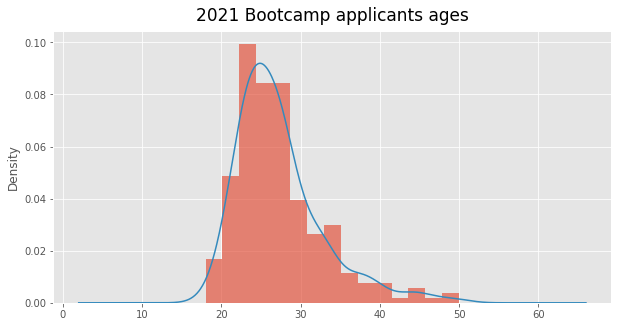

In [38]:
form_param(text="For the whole dataset")

For the whole male dataset
The variance is : 30.09
The standard deviation is : 5.49
The kurtosis coef is : 5.38
The skewness coef is : 1.39


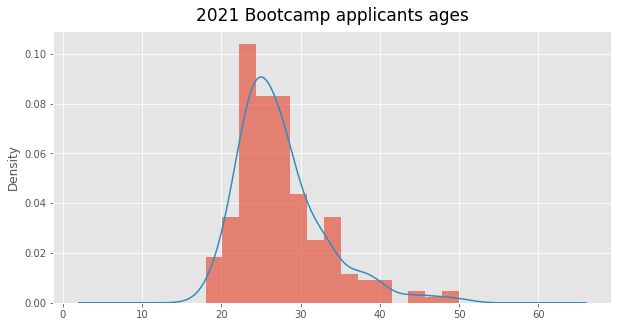

In [39]:
form_param(data = male, text="For the whole male dataset")

For the whole female dataset
The variance is : 27.3
The standard deviation is : 5.22
The kurtosis coef is : 6.72
The skewness coef is : 1.82


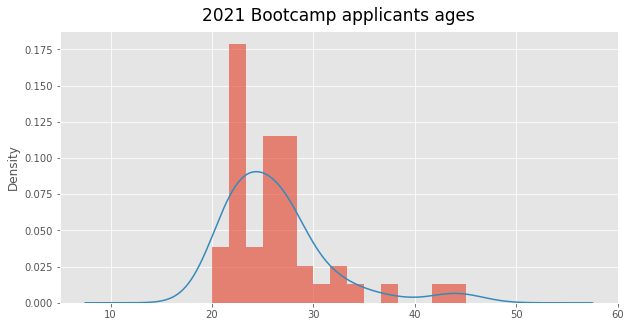

In [40]:
form_param(data = female, text="For the whole female dataset")

In [83]:
rng = np.random.default_rng()
x = final_db.age
shapiro_test = shapiro(x)
shapiro_test
#perform Jarque-Bera test
res = jarque_bera(x)
if res[1]>0:
  print(f"Since this p-value = {res[1]} is not less than .05, we fail to reject the null hypothesis. \nWe don’t have sufficient evidence to say that this data has skewness and kurtosis that is \nsignificantly different from a normal distribution.")
else: 
  print(f"Since this p-value = {res[1]}, is less than .05, we reject the null hypothesis. Thus, \nwe have sufficient evidence to say that this data has skewness and kurtosis that is \nsignificantly different from a normal distribution.")

Since this p-value = 0.0, is less than .05, we reject the null hypothesis. Thus, 
we have sufficient evidence to say that this data has skewness and kurtosis that is 
significantly different from a normal distribution.


### 3.Display the age frequency disbrution
   * On the whole dataset
   * On the whole male dataset
   * On all the female dataset

In [42]:
#here your codes
#graphics in 2

### 4. Can we say that the average age (24 years old) of the observations can be considered as the average age of the population likely to participate in this bootcamp. Justify your answer

In [79]:
#here your codes
# H0 : Mu = 24
# H1 : Mu != 24
stat, p = ttest_1samp(final_db.age.dropna(), popmean=24) #alternative="two-sided")
print('Statistics=%.2f, p=%.2f' % (stat, p))
# interpretation
alpha = 0.05
if p > alpha:
    print('ho mu=24 (fail to reject H0)')
else:
    print('h1 mu!= 24 (reject H0)')

Statistics=9.53, p=0.00
h1 mu!= 24 (reject H0)


### 5. Calculate the average age of participants for each communication channel

In [94]:
#here your codes
chanels_mean_age = pd.pivot_table(data=final_db, index= "channels", values='age', aggfunc='mean')
chanels_mean_age.age.round(2)

channels
Ayiti Analytics Website    27.00
Bootcamp Alumni            26.29
ESIH                       25.14
Facebook                   27.50
Friend                     27.01
Instagram                  24.60
LinkedIn                   30.02
WhatsApp                   27.79
other                      28.44
unknown                    22.00
Name: age, dtype: float64

### 6. Display an age boxplot for each communication channel

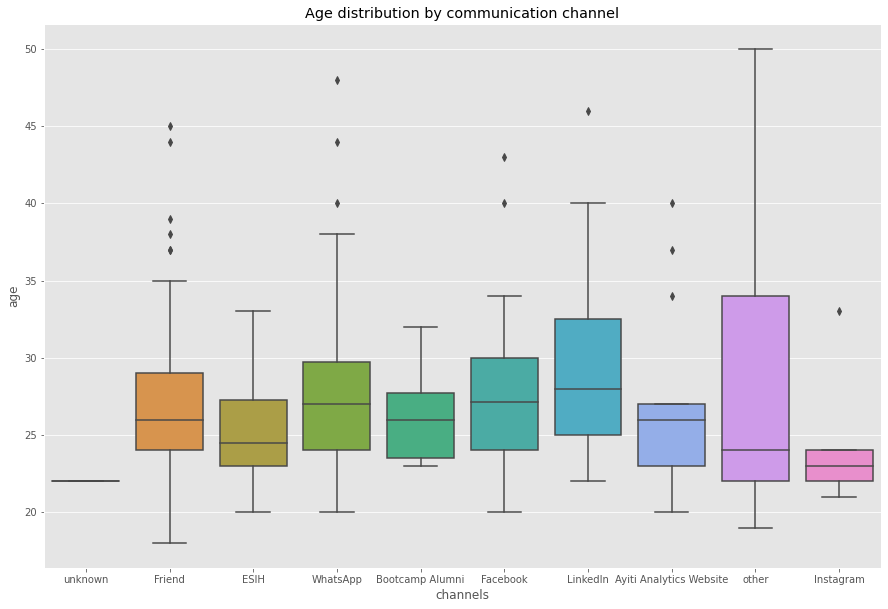

In [45]:
#here your codes
plt.figure(figsize=(15,10))
sns.boxplot( x=final_db["channels"], y=final_db["age"]);
plt.title("Age distribution by communication channel")
plt.show()

### 7 .Is there a significant age difference between these groups

A one-way ANOVA uses the following null and alternative hypotheses:

H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (all the population means are equal)

H1 (Alternative hypothesis): at least one population mean is different from the rest

In [46]:
#here your codes
data1 = final_db[final_db["channels"]=="Ayiti Analytics Website"].age
data2 = final_db[final_db["channels"]=="Friend"].age
data3 = final_db[final_db["channels"]=="Facebook"].age
data4 = final_db[final_db["channels"]=="ESIH"].age
data5 = final_db[final_db["channels"]=="LinkedIn"].age
data6 = final_db[final_db["channels"]=="Instagram"].age
data7 = final_db[final_db["channels"]=="WhatsApp"].age
data8 = final_db[final_db["channels"]=="Bootcamp Alumni"].age
data9 = final_db[final_db["channels"]=="other"].age

In [86]:
test_result = f_oneway(data1, data2, data3, data4, data5, data6, data7, data8, data9)
if test_result.pvalue>0.05:
  print(f"Since the p-value = {round(test_result.pvalue,3)} is not less than .05, \nwe fail to reject the null hypothesis. This means we do not have sufficient \nevidence to say that there is a difference mean age among channels. HO")
else:
  print(f"Since the p-value = {round(test_result.pvalue,3)} is less than .05, we cannot accept the null hypothesis. This means we do not have sufficient evidence to say that there is a difference in exam scores among the three studying techniques. H1")

Since the p-value = 0.302 is not less than .05, 
we fail to reject the null hypothesis. This means we do not have sufficient 
evidence to say that there is a difference mean age among channels. HO


### 8.Plan a BA strategy for each communication channel regarding the age group

In [48]:
#here your codes

### 9.According to the observations what is the probability of being in each channel of communication knowing your are a woman

In [49]:
#here your codes
def proba_col1_knowing_col2(data=final_db, col1="channels", col2="gender", col2_modalitie="", normalize="index" ):
  tab_proba = pd.crosstab(final_db[col2], final_db[col1], normalize="index")
  print(f"Probability of {col1} knowing {col2} = {col2_modalitie}: ")
  if col2_modalitie in tab_proba.index:
    for col in tab_proba.columns:
      print(f"The probability of {col} as {col1} knowing {col2_modalitie} is : {round(tab_proba.at[col2_modalitie,col],4)}")
  else:
    for col in tab_proba.index:
      print(f"The probability of {col1} as {col2_modalitie} knowing {col} is : {round(tab_proba.at[col,col2_modalitie],4)}")
proba_col1_knowing_col2(col2_modalitie="female")

Probability of channels knowing gender = female: 
The probability of Ayiti Analytics Website as channels knowing female is : 0.0851
The probability of Bootcamp Alumni as channels knowing female is : 0.1702
The probability of ESIH as channels knowing female is : 0.1064
The probability of Facebook as channels knowing female is : 0.1277
The probability of Friend as channels knowing female is : 0.234
The probability of Instagram as channels knowing female is : 0.0213
The probability of LinkedIn as channels knowing female is : 0.0213
The probability of WhatsApp as channels knowing female is : 0.1915
The probability of other as channels knowing female is : 0.0426
The probability of unknown as channels knowing female is : 0.0


### 10.According to the observations what is the probability of being in each channel of communication knowing your are a man

In [50]:
#here your codes
proba_col1_knowing_col2(col2_modalitie="male")

Probability of channels knowing gender = male: 
The probability of Ayiti Analytics Website as channels knowing male is : 0.0542
The probability of Bootcamp Alumni as channels knowing male is : 0.0296
The probability of ESIH as channels knowing male is : 0.064
The probability of Facebook as channels knowing male is : 0.1675
The probability of Friend as channels knowing male is : 0.2759
The probability of Instagram as channels knowing male is : 0.0197
The probability of LinkedIn as channels knowing male is : 0.069
The probability of WhatsApp as channels knowing male is : 0.2808
The probability of other as channels knowing male is : 0.0345
The probability of unknown as channels knowing male is : 0.0049


### 11. Deduce the probability of being a woman knowing each communication channel

In [51]:
#here your codes
proba_col1_knowing_col2(data=final_db, col1="gender", col2="channels", col2_modalitie="female", normalize="index")

Probability of gender knowing channels = female: 
The probability of gender as female knowing Ayiti Analytics Website is : 0.2667
The probability of gender as female knowing Bootcamp Alumni is : 0.5714
The probability of gender as female knowing ESIH is : 0.2778
The probability of gender as female knowing Facebook is : 0.15
The probability of gender as female knowing Friend is : 0.1642
The probability of gender as female knowing Instagram is : 0.2
The probability of gender as female knowing LinkedIn is : 0.0667
The probability of gender as female knowing WhatsApp is : 0.1364
The probability of gender as female knowing other is : 0.2222
The probability of gender as female knowing unknown is : 0.0


### 13. Deduce the probability of being a woman knowing each communication channel

In [52]:
# here your codes
proba_col1_knowing_col2(data=final_db, col1="gender", col2="channels", col2_modalitie="female", normalize="index")

Probability of gender knowing channels = female: 
The probability of gender as female knowing Ayiti Analytics Website is : 0.2667
The probability of gender as female knowing Bootcamp Alumni is : 0.5714
The probability of gender as female knowing ESIH is : 0.2778
The probability of gender as female knowing Facebook is : 0.15
The probability of gender as female knowing Friend is : 0.1642
The probability of gender as female knowing Instagram is : 0.2
The probability of gender as female knowing LinkedIn is : 0.0667
The probability of gender as female knowing WhatsApp is : 0.1364
The probability of gender as female knowing other is : 0.2222
The probability of gender as female knowing unknown is : 0.0


### 14. Deduce the probability of being a man knowing each communication channel

In [53]:
#here your codes
proba_col1_knowing_col2(data=final_db, col1="gender", col2="channels", col2_modalitie="male", normalize="index")

Probability of gender knowing channels = male: 
The probability of gender as male knowing Ayiti Analytics Website is : 0.7333
The probability of gender as male knowing Bootcamp Alumni is : 0.4286
The probability of gender as male knowing ESIH is : 0.7222
The probability of gender as male knowing Facebook is : 0.85
The probability of gender as male knowing Friend is : 0.8358
The probability of gender as male knowing Instagram is : 0.8
The probability of gender as male knowing LinkedIn is : 0.9333
The probability of gender as male knowing WhatsApp is : 0.8636
The probability of gender as male knowing other is : 0.7778
The probability of gender as male knowing unknown is : 1.0


### 15 Display a plot to see Gender vs Communication Channels .Is there any dependency between communication channels and gender?

In [95]:
def graph_and_test(data=final_db, col1="", col2="", graph_title ="Communication channels by gender", l=(12,6)):
  graph_tab = pd.crosstab(data[col1], final_db[col2], margins = True)
  graph_tab.iloc[:-1,:-1].plot.bar(figsize=l)
  plt.title(graph_title)
  plt.legend()
  plt.show()
  chi2, pval, dof, expected = chi2_contingency(graph_tab[graph_tab.All>5].iloc[:-1,:-1])
  print(f"We perform a test of khi-square on the variable {col1} and {col2}.")
  if pval<0.05:
    print(f"we find out that {pval} is smaller than 0.05")
    print(f"we can therefore conclude that the association between the variables {col1} and {col2} is statistically significant.")
  else:
    print(f"we find out that {pval} is bigger than 0.05")
    print(f"we can therefore conclude that the association between the variables \n{col1} and {col2} is not statistically significant.")



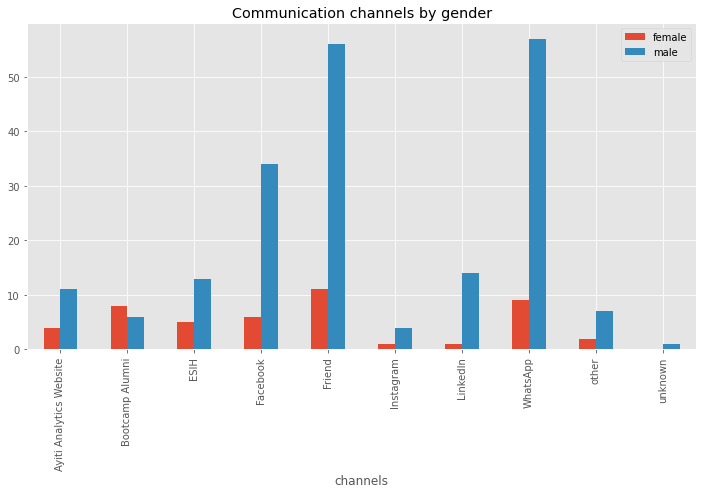

We perform a test of khi-square on the variable channels and gender.
we find out that 0.010697487425548971 is smaller than 0.05
we can therefore conclude that the association between the variables channels and gender is statistically significant.


In [96]:
graph_and_test(col1="channels", col2="gender")

### 16 Use the same method to display plot and know if is there any dependency between communication channels and Bootcamp Insterest?

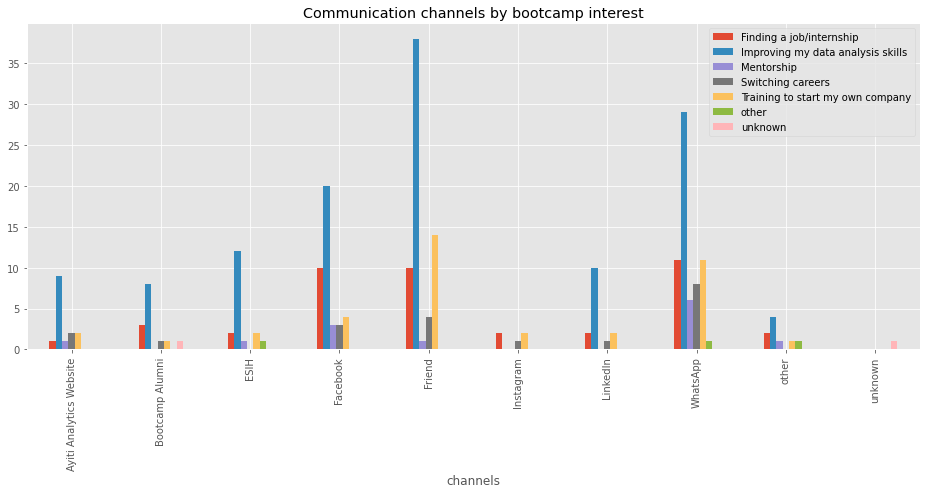

We perform a test of khi-square on the variable channels and interest.
we find out that 0.23290336731984587 is bigger than 0.05
we can therefore conclude that the association between the variables 
channels and interest is not statistically significant.


In [97]:
# here your codes
graph_and_test(col1="channels", col2="interest", graph_title ="Communication channels by bootcamp interest", l=(16,6))

### 17.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender 

In [57]:
#here your codes


### 18.Plan a BA  strategy for each communication channel, Bootcamp Insterest regarding the gender

In [58]:
# here your codes


### 19. Calculate 
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=yes)
    * P(Bootcamp Insterest,Communication channels,Gender/Payed=no)

In [92]:
def calcul_proba(payed="", p=""):
  m = len(final_db[final_db["paid"]==payed])
  cond_proba = pd.pivot_table(final_db[final_db["paid"]=="yes"], values="quest_id", index=["interest","channels", "gender"], aggfunc='count')
  cond_proba["quest_id"] = cond_proba["quest_id"]/m
  cond_proba.rename(columns={"quest_id": p}, inplace=True)
  return cond_proba
prob1 = calcul_proba(payed="yes", p="P(Bootcamp Insterest,Communication channels,Gender/Payed=yes)")
prob1

P(Bootcamp Insterest,Communication channels,Gender/Payed=yes)
interest                          channels                gender                                                               
Finding a job/internship          Ayiti Analytics Website male                                             0.015385            
                                  Bootcamp Alumni         female                                           0.015385            
                                  ESIH                    male                                             0.015385            
                                  Facebook                male                                             0.015385            
                                  Friend                  female                                           0.015385            
                                                          male                                             0.030769            
                                  Instagram               male                                             0.015385            
                                  LinkedIn                male                                             0.015385            
                                  WhatsApp                female                                           0.015385            
                                                          male                                             0.046154            
Improving my data analysis skills Ayiti Analytics Website male                                             0.015385            
                                  Bootcamp Alumni         female                                           0.015385            
                                                          male                                             0.076923            
                                  ESIH                    male                                             0.030769            
                                  Facebook                female                                           0.030769            
                                                          male                                             0.076923            
                                  Friend                  female                                           0.030769            
                                                          male                                             0.215385            
                                  LinkedIn                female                                           0.015385            
                                                          male                                             0.015385            
                                  WhatsApp                female                                           0.046154            
                                                          male                                             0.046154            
                                  other                   male                                             0.015385            
Mentorship                        other                   female                                           0.015385            
Switching careers                 Bootcamp Alumni         female                                           0.015385            
Training to start my own company  Ayiti Analytics Website male                                             0.015385            
                                  Facebook                male                                             0.015385            
                                  Friend                  male                                             0.046154            
                                  WhatsApp                male                                             0.030769            
other                             ESIH                    male                                    

In [93]:
prob2 = calcul_proba(payed="no", p="P(Bootcamp Insterest,Communication channels,Gender/Payed=no)")
prob2

P(Bootcamp Insterest,Communication channels,Gender/Payed=no)
interest                          channels                gender                                                              
Finding a job/internship          Ayiti Analytics Website male                                             0.005405           
                                  Bootcamp Alumni         female                                           0.005405           
                                  ESIH                    male                                             0.005405           
                                  Facebook                male                                             0.005405           
                                  Friend                  female                                           0.005405           
                                                          male                                             0.010811           
                                  Instagram               male                                             0.005405           
                                  LinkedIn                male                                             0.005405           
                                  WhatsApp                female                                           0.005405           
                                                          male                                             0.016216           
Improving my data analysis skills Ayiti Analytics Website male                                             0.005405           
                                  Bootcamp Alumni         female                                           0.005405           
                                                          male                                             0.027027           
                                  ESIH                    male                                             0.010811           
                                  Facebook                female                                           0.010811           
                                                          male                                             0.027027           
                                  Friend                  female                                           0.010811           
                                                          male                                             0.075676           
                                  LinkedIn                female                                           0.005405           
                                                          male                                             0.005405           
                                  WhatsApp                female                                           0.016216           
                                                          male                                             0.016216           
                                  other                   male                                             0.005405           
Mentorship                        other                   female                                           0.005405           
Switching careers                 Bootcamp Alumni         female                                           0.005405           
Training to start my own company  Ayiti Analytics Website male                                             0.005405           
                                  Facebook                male                                             0.005405           
                                  Friend                  male                                             0.016216           
                                  WhatsApp                male                                             0.010811           
other                             ESIH                    male                                             0.005405           
  

### 20 reduce 
* P(Payed="yes"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")
* P(Payed="no"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",Gender="male")

In [61]:
# here your codes
cond = final_db[(final_db["interest"]=="Improving my data analysis skills") & (final_db["channels"]=="Friend") & (final_db["gender"]=="male")]
proba = cond.paid.value_counts(normalize=1).to_frame()
print(f'P(Payed="yes"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",\nGender="male") = {proba.at["yes", "paid"]}')
print(f'P(Payed="no"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",\nGender="male") = {proba.at["no", "paid"]}') 

P(Payed="yes"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",
Gender="male") = 0.4375
P(Payed="no"/Bootcamp Insterest="Increase Skill",Communication channels="Friend",
Gender="male") = 0.5625


### Based on these findings, propose strategies to increase our sales?

In [62]:
#here your codes